In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import matplotlib.pyplot as plt

# Read data

In [4]:
INPUT_PATH = "/home/jupyter/DATA/"#"/kaggle/input/ranzcr-clip-catheter-line-classification/"
TRAIN_PATH=INPUT_PATH+"train/"
TEST_PATH=INPUT_PATH+"test/"
MODEL_BACKBONE="resnet50"

print(f"Number of train images {len(os.listdir(TRAIN_PATH))}\nNumber of test images {len(os.listdir(TEST_PATH))}")

ANNOTATIONS=INPUT_PATH+"train.csv"

df_annotations=pd.read_csv(ANNOTATIONS)
df_annotations.head(20)

Number of train images 30083
Number of test images 3582


,StudyInstanceUID,ETT - Abnormal,ETT - Borderline,ETT - Normal,NGT - Abnormal,NGT - Borderline,NGT - Incompletely Imaged,NGT - Normal,CVC - Abnormal,CVC - Borderline,CVC - Normal,Swan Ganz Catheter Present,PatientID
0,1.2.826.0.1.3680043.8.498.26697628953273228189...,0,0,0,0,0,0,1,0,0,0,0,ec89415d1
1,1.2.826.0.1.3680043.8.498.46302891597398758759...,0,0,1,0,0,1,0,0,0,1,0,bf4c6da3c
2,1.2.826.0.1.3680043.8.498.23819260719748494858...,0,0,0,0,0,0,0,0,1,0,0,3fc1c97e5
3,1.2.826.0.1.3680043.8.498.68286643202323212801...,0,0,0,0,0,0,0,1,0,0,0,c31019814
4,1.2.826.0.1.3680043.8.498.10050203009225938259...,0,0,0,0,0,0,0,0,0,1,0,207685cd1
5,1.2.826.0.1.3680043.8.498.11707076266253086830...,0,0,1,0,0,0,1,0,0,1,0,8260896cf
6,1.2.826.0.1.3680043.8.498.23133310896792275593...,0,0,0,0,0,0,0,0,1,1,0,f6147af3f
7,1.2.826.0.1.3680043.8.498.17332833449968516367...,0,0,1,0,0,0,1,0,1,0,0,27413587b
8,1.2.826.0.1.3680043.8.498.91266853519846682206...,0,0,0,0,0,1,0,0,0,1,0,2edf3dce3
9,1.2.826.0.1.3680043.8.498.12706894217669234973...,0,1,0,0,0,0,1,0,0,1,0,3d5e7832e


In [5]:
targets=["ETT - Abnormal","ETT - Borderline","ETT - Normal",
         "NGT - Abnormal","NGT - Borderline","NGT - Incompletely Imaged","NGT - Normal",
         "CVC - Abnormal","CVC - Borderline","CVC - Normal",
         "Swan Ganz Catheter Present"]

In [6]:
paths_img=TRAIN_PATH+df_annotations.StudyInstanceUID+".jpg"
labels_img=df_annotations[targets].values

from sklearn.model_selection import train_test_split
train_paths, valid_paths, train_labels, valid_labels = train_test_split(paths_img, labels_img, test_size=0.2, random_state=42)

# Exploration
## Number of images per patient

Text(0.5, 0, 'Number of samples per patient')

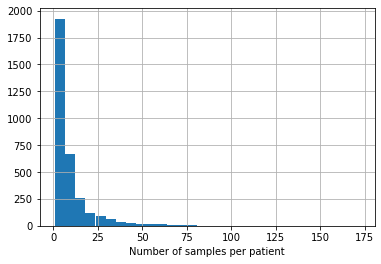

In [7]:
df_annotations.PatientID.value_counts().hist(bins=30)
plt.xlabel("Number of samples per patient")

## Targets: Percentages for each case

In [8]:
for tgt in targets:
    print(f"{tgt} is present in {df_annotations[tgt].sum()/df_annotations.shape[0]:.2f}% ({df_annotations[tgt].sum()}) of samples")

ETT - Abnormal is present in 0.00% (79) of samples
ETT - Borderline is present in 0.04% (1138) of samples
ETT - Normal is present in 0.24% (7240) of samples
NGT - Abnormal is present in 0.01% (279) of samples
NGT - Borderline is present in 0.02% (529) of samples
NGT - Incompletely Imaged is present in 0.09% (2748) of samples
NGT - Normal is present in 0.16% (4797) of samples
CVC - Abnormal is present in 0.11% (3195) of samples
CVC - Borderline is present in 0.28% (8460) of samples
CVC - Normal is present in 0.71% (21324) of samples
Swan Ganz Catheter Present is present in 0.03% (830) of samples


## Targets: Coocurrence

Text(0.5, 0, 'Number of positive targets')

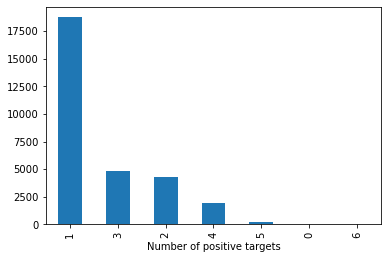

In [9]:
# Number of positive targets for sample
df_annotations[targets].sum(axis=1).value_counts().plot.bar()
plt.xlabel("Number of positive targets")

## Targets: Coocurrence - Most frequent target combination

In [10]:
df_annotations["all_targets"]=df_annotations[targets].values.tolist()
targets_counts=df_annotations["all_targets"].apply(tuple).value_counts()
targets_counts=targets_counts.reset_index()
targets_counts.columns=["all_targets","count"]
targets_counts

,all_targets,count
0,"(0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)",12763
1,"(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0)",4038
2,"(0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)",1678
3,"(0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0)",1428
4,"(0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0)",973
...,...,...
206,"(0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0)",1
207,"(1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1)",1
208,"(0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0)",1
209,"(0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0)",1


In [11]:
def get_target_string(target_bools):
    positions=np.where(target_bools)[0]
    return " -- ".join([targets[pos] for pos in positions])

targets_counts.all_targets=targets_counts.all_targets.apply(get_target_string)
targets_counts.head()

,all_targets,count
0,CVC - Normal,12763
1,CVC - Borderline,4038
2,CVC - Abnormal,1678
3,ETT - Normal -- NGT - Normal -- CVC - Normal,1428
4,CVC - Borderline -- CVC - Normal,973


## Machine learning: Image classification - Multilabel approach

In [12]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

Tensorflow version: 2.4.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
# Define the strategy

try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print("Running on TPU ", tpu.cluster_spec().as_dict()["worker"])
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    
except ValueError:
    print("Not connected to a TPU runtime. Using CPU/GPU strategy")
    strategy = tf.distribute.MirroredStrategy()

Not connected to a TPU runtime. Using CPU/GPU strategy
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [14]:
from tensorflow.keras.applications import ResNet50, ResNet152, EfficientNetB0,EfficientNetB3, EfficientNetB7, DenseNet121

# Transfer learning using different models

IMG_SIZE=512
NUM_CLASSES=len(targets)
if MODEL_BACKBONE=="resnet50":backbone=ResNet50
elif MODEL_BACKBONE=="resnet152": backbone=ResNet152
elif MODEL_BACKBONE=="efficientnetB0": backbone=EfficientNetB0
elif MODEL_BACKBONE=="efficientnetB3": backbone=EfficientNetB3
elif MODEL_BACKBONE=="efficientnetB7": backbone=EfficientNetB7
else: backbone = DenseNet121



with strategy.scope():
    model = tf.keras.Sequential([
              tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
              backbone(include_top=False, weights='imagenet'),
              #tf.keras.layers.Flatten(),
              tf.keras.layers.GlobalAveragePooling2D(), #https://datascience.stackexchange.com/questions/80072/is-flatten-layer-in-keras-necessary
              #tf.keras.layers.Dense(128,activation='relu'),
              tf.keras.layers.Dense(NUM_CLASSES,activation="sigmoid"), # multi-label
    ])
    
    #model.compile(
    #    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC(multi_label=True)])
    

    
model.summary()

INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Redu

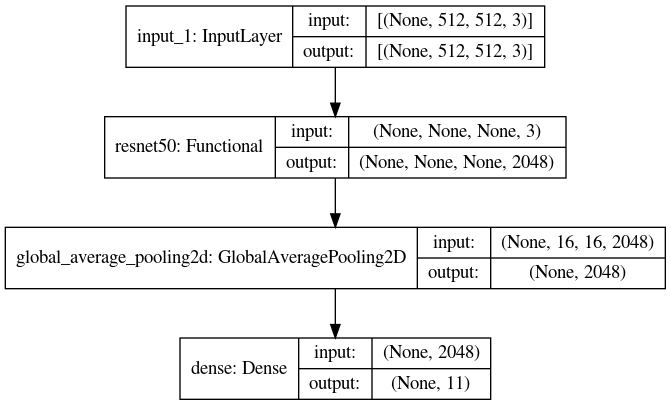

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)
from IPython.display import Image
Image(filename='model.png') 

In [16]:
#for layer in model.layers:
#    if layer.name == "efficientnetb3":
#        layer.trainable=False

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 11)                22539     
Total params: 23,610,251
Trainable params: 23,557,131
Non-trainable params: 53,120
_________________________________________________________________


### Input functions

In [18]:
#from kaggle_datasets import KaggleDatasets
#PATH_GCS = KaggleDatasets().get_gcs_path("ranzcr-clip-catheter-line-classification")

#PATH_GCS_TRAINING=PATH_GCS+"/train_tfrecords/"+"*.tfrec"
#filenames = tf.io.gfile.glob(PATH_GCS_TRAINING)
#raw_dataset = tf.data.TFRecordDataset(filenames)


# Inspect a raw tfrecord
#for raw_record in raw_dataset.take(1):
#      print(repr(raw_record))

In [19]:
# https://www.tensorflow.org/tutorials/load_data/tfrecord#reading_a_tfrecord_file
# https://www.kaggle.com/venkat555/ranzcr-clip-tpu-densenet-with-kfold

feature_description = {
    "StudyInstanceUID"           : tf.io.FixedLenFeature([], tf.string),
    "image"                      : tf.io.FixedLenFeature([], tf.string),
    "ETT - Abnormal"             : tf.io.FixedLenFeature([], tf.int64), 
    "ETT - Borderline"           : tf.io.FixedLenFeature([], tf.int64), 
    "ETT - Normal"               : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Abnormal"             : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Borderline"           : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Incompletely Imaged"  : tf.io.FixedLenFeature([], tf.int64), 
    "NGT - Normal"               : tf.io.FixedLenFeature([], tf.int64), 
    "CVC - Abnormal"             : tf.io.FixedLenFeature([], tf.int64), 
    "CVC - Borderline"           : tf.io.FixedLenFeature([], tf.int64), 
    "CVC - Normal"               : tf.io.FixedLenFeature([], tf.int64), 
    "Swan Ganz Catheter Present" : tf.io.FixedLenFeature([], tf.int64),
}

def _parse_function(example_proto):
  # Parse the input `tf.train.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)


def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    #image = tf.reshape(image, [1024,1024, 3])
    return image

def input_fc_tfrecords(example_proto):
    example = _parse_function(example_proto)
    image = decode_image(example['image']) 
    image = tf.image.resize(image, [IMG_SIZE,IMG_SIZE])
    
    label=[tf.cast(example[lbl],tf.float32) for lbl in targets]
    #label=tf.one_hot(label, len(targets))
    
    return image,label

In [20]:
# Functions for plain data (no tfrecords)
def read_image(path):
    img=tf.io.read_file(path)
    return img

def input_fc(path,label=None):
    image = read_image(path)
    image = decode_image(image) 
    image = tf.image.resize(image, [IMG_SIZE,IMG_SIZE])
    
    #label=tf.cast(label,tf.float32)
    #label=tf.one_hot(label, len(targets))
    if label is None:
        return image
    return image,label


In [21]:
# Define a basic image augmentation with tensoflow

def augmentation_fc(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.5)
    image = tf.image.random_saturation(image, 0, 2)
    image = tf.image.adjust_saturation(image, 3)
    return image, label

In [22]:
def get_dataset_tfrecords(filenames,shuffle,batch_size,mode="train",augmentation=True):
    AUTOTUNE=tf.data.experimental.AUTOTUNE
    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
    dataset = dataset.map(input_fc_tfrecords, num_parallel_calls=AUTOTUNE)
    if mode=="train": 
        if augmentation: dataset = dataset.map(augmentation_fc, num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
        dataset = dataset.shuffle(shuffle, reshuffle_each_iteration=True)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset


def get_dataset(filenames,labels,shuffle,batch_size,mode="train",augmentation=True):
    AUTOTUNE=tf.data.experimental.AUTOTUNE
    if mode=="test":
        slices=(filenames)
    else:slices=(filenames,labels)
    
    dataset = tf.data.Dataset.from_tensor_slices(slices)
    dataset = dataset.map(input_fc, num_parallel_calls=AUTOTUNE)
    if mode=="train": 
        if augmentation: dataset = dataset.map(augmentation_fc, num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
        dataset = dataset.shuffle(shuffle, reshuffle_each_iteration=True)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTOTUNE)
    return dataset



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 512, 512, 3) (1, 11)
[[0 0 1 0 0 0 0 0 0 1 0]]


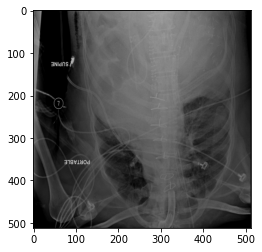

In [23]:
 for image,label in get_dataset(train_paths,train_labels,shuffle=1,batch_size=1).take(1):
    plt.figure()
    plt.imshow(image.numpy()[0])
    print(image.numpy().shape, label.numpy().shape)
    print(label.numpy())

In [24]:
## Train - validation split and input functions
#len(filenames)
#filenames_train = filenames[:12]
#filenames_val = filenames[12:]

BATCH_SIZE = 128
SHUFFLE = 8


import re
# From https://www.kaggle.com/venkat555/ranzcr-clip-tpu-densenet-with-kfold
def count_data_items(filenames):
    #the number of data items is written in the name of the .tfrec files, i.e. flowers00-230.tfrec = 230 data items
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)
    #c = 0
    #for filename in filenames:
    #    c += sum(1 for _ in tf.data.TFRecordDataset(filename))
    #return c
NUM_TRAINING_IMAGES = len(train_paths)#count_data_items(filenames_train)
NUM_TEST_IMAGES = len(valid_paths)#count_data_items(filenames_val)
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

def get_train_dataset():
    return get_dataset(train_paths,train_labels,BATCH_SIZE,SHUFFLE,augmentation=True)


def get_val_dataset():
    return get_dataset(valid_paths,valid_labels,BATCH_SIZE,SHUFFLE,mode="val")



In [25]:
STEPS_PER_EPOCH

188

In [26]:
%%time
EPOCHS=2000

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    f'model-{MODEL_BACKBONE}.h5', save_best_only=True, monitor='val_auc', mode='max')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                  min_delta=0, 
                                                  patience=10, verbose=1, 
                                                  restore_best_weights=True)
lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_auc", patience=3, min_lr=1e-6, mode='max')

tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")    


hist = model.fit(get_train_dataset(), epochs=EPOCHS,steps_per_epoch=STEPS_PER_EPOCH,
                 validation_data=get_val_dataset(),
                 callbacks=[checkpoint, early_stopping,lr_reducer, tensorboard_callback],
                 )

Epoch 1/2000
188/188 [==============================] - 329s 2s/step - loss: 0.3613 - auc: 0.5195 - val_loss: 0.3546 - val_auc: 0.5227
Epoch 2/2000
188/188 [==============================] - 252s 1s/step - loss: 0.2985 - auc: 0.5356 - val_loss: 0.3351 - val_auc: 0.5267
Epoch 3/2000
188/188 [==============================] - 252s 1s/step - loss: 0.3069 - auc: 0.5099 - val_loss: 0.3049 - val_auc: 0.5379
Epoch 4/2000
188/188 [==============================] - 250s 1s/step - loss: 0.2992 - auc: 0.5251 - val_loss: 0.3809 - val_auc: 0.5122
Epoch 5/2000
188/188 [==============================] - 250s 1s/step - loss: 0.2957 - auc: 0.5519 - val_loss: 0.3263 - val_auc: 0.5292
Epoch 6/2000
188/188 [==============================] - 250s 1s/step - loss: 0.3023 - auc: 0.5406 - val_loss: 0.3235 - val_auc: 0.5960
Epoch 7/2000
188/188 [==============================] - 250s 1s/step - loss: 0.2924 - auc: 0.5503 - val_loss: 0.4743 - val_auc: 0.5810
Epoch 8/2000
188/188 [==============================] -

KeyboardInterrupt: 

In [52]:
## Evaluation results
model.load_weights(f'model-{MODEL_BACKBONE}.h5')

predict_targets=model.predict(get_val_dataset())

from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix,ConfusionMatrixDisplay
predict_oneh=predict_targets>0.5
predict_oneh=predict_oneh.astype(int)
cm = multilabel_confusion_matrix(valid_labels, predict_oneh)#, labels=targets
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                              )#display_labels=labels
#disp.plot()

In [51]:
cm

array([[[6009,    0],
        [   8,    0]],

       [[5789,    0],
        [ 228,    0]],

       [[4166,  419],
        [ 614,  818]],

       [[5961,    0],
        [  56,    0]],

       [[5926,    0],
        [  91,    0]],

       [[5469,    0],
        [ 548,    0]],

       [[4931,  153],
        [ 771,  162]],

       [[5375,    0],
        [ 642,    0]],

       [[4374,    0],
        [1643,    0]],

       [[   0, 1764],
        [   0, 4253]],

       [[5845,    0],
        [ 172,    0]]])

In [47]:
predict_oneh.shape

(6017, 11)

In [48]:
valid_labels.shape

(6017, 11)

In [44]:
targets

['ETT - Abnormal',
 'ETT - Borderline',
 'ETT - Normal',
 'NGT - Abnormal',
 'NGT - Borderline',
 'NGT - Incompletely Imaged',
 'NGT - Normal',
 'CVC - Abnormal',
 'CVC - Borderline',
 'CVC - Normal',
 'Swan Ganz Catheter Present']

In [ ]:
df_test = pd.read_csv(INPUT_PATH + 'sample_submission.csv')
test_paths = INPUT_PATH + "test/" + df_test['StudyInstanceUID'] + '.jpg'

def get_test_dataset():
    return get_dataset(test_paths,None,BATCH_SIZE,SHUFFLE,mode="test")


df_test[targets] = model.predict(get_test_dataset(), verbose=1)
df_test.to_csv('submission.csv', index=False)

df_test.head()